In [1]:
# 시각화 라이브러리
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 지도 시각화를 위한 라이브러리
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [5]:
cctv_busan = pd.read_csv('data/cctv_busan.csv')

print(cctv_busan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        212 non-null    int64  
 1   address   212 non-null    object 
 2   lng       212 non-null    float64
 3   lat       212 non-null    float64
 4   url       212 non-null    object 
 5   geometry  212 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB
None


In [7]:
cctv_busan = pd.read_csv('data/cctv_busan.csv')
cctv_busan = pd.DataFrame(data=cctv_busan, columns=['id','name','lng','lat', 'url', 'geometry'])
cctv_busan.head(3)

id  name         lng        lat  \
0  79   NaN  129.123994  35.173625   
1  53   NaN  129.125610  35.165390   
2  54   NaN  129.128130  35.159910   

                                                 url  \
0  https://its.busan.go.kr/traffic/exclude/cctvPo...   
1  https://its.busan.go.kr/traffic/exclude/cctvPo...   
2  https://its.busan.go.kr/traffic/exclude/cctvPo...   

                         geometry  
0  POINT (129.1239937 35.1736251)  
1      POINT (129.12561 35.16539)  
2      POINT (129.12813 35.15991)

In [6]:
cctv_busan = pd.read_csv('data/cctv_busan.csv')

신호등_busan = pd.read_csv('data/신호등_busan.csv')

진로변경방법위반_busan = pd.read_csv('data/진로변경방법위반_busan.csv')
중앙선침범_busan = pd.read_csv('data/중앙선침범_busan.csv')
신호위반_busan = pd.read_csv('data/신호위반_busan.csv') 
불법좌회전_busan = pd.read_csv('data/불법좌회전_busan.csv')
불법유턴_busan = pd.read_csv('data/불법유턴_busan.csv')

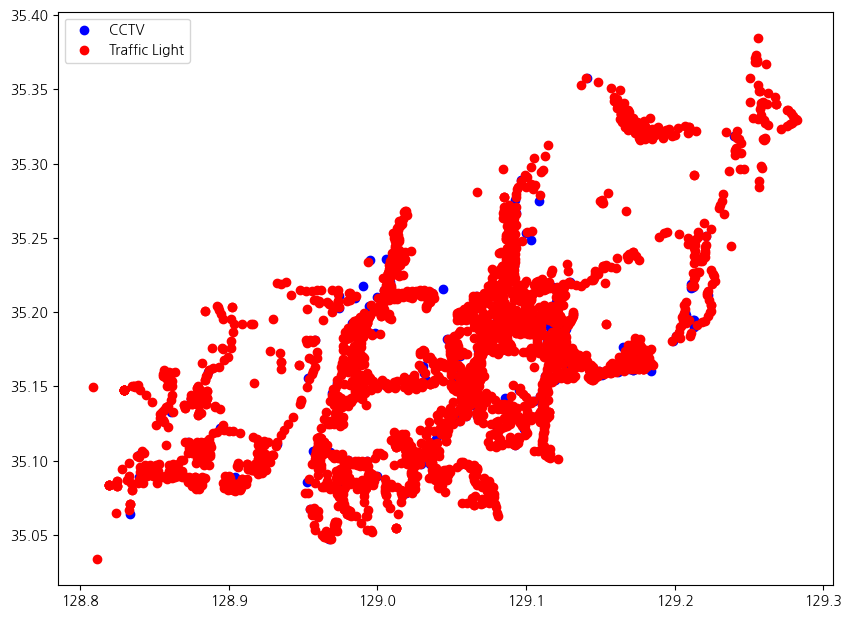

In [16]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_traffic_light = gpd.GeoDataFrame(신호등_busan, geometry=gpd.points_from_xy(신호등_busan.lng, 신호등_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(10, 10))

# CCTV 위치 표시
gdf_cctv.plot(ax=ax, color='blue', label='CCTV')

# 신호등 위치 표시
gdf_traffic_light.plot(ax=ax, color='red', label='Traffic Light')

plt.legend()
plt.show()

In [65]:
# 엑셀 파일 불러오기
df = pd.read_excel('data/불법좌회전_busan.xlsx')

# 위도와 경도로부터 Point 객체 생성하여 'geometry' 컬럼에 저장
df['geometry'] = gpd.points_from_xy(df.lng, df.lat)

# DataFrame을 GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# 확인
print(gdf.head())


    월   일        lat         lng                    주소  \
0  12  31  35.176558  129.072358  부산광역시 부산진구 양정동 322번길   
1  12  31  35.183910  129.201086  부산광역시 해운대구 송정동 451번길   
2  12  31  35.153933  129.071515  부산광역시 부산진구 전포동 834번길   
3  12  31  35.154525  129.068387  부산광역시 부산진구 전포동 336번길   
4  12  31  35.185579  129.087269  부산광역시 연제구 연산동 1530번길   

                     geometry  
0  POINT (129.07236 35.17656)  
1  POINT (129.20109 35.18391)  
2  POINT (129.07152 35.15393)  
3  POINT (129.06839 35.15452)  
4  POINT (129.08727 35.18558)  


In [66]:
gdf['geometry'] = gdf['geometry'].apply(lambda x: str(x))

# Excel 파일로 저장하기
gdf.to_excel('불법좌회전_busan.xlsx', index=False)

C:\Users\82108\AppData\Local\Temp\ipykernel_38324\2827521143.py:1: UserWarning: Geometry column does not contain geometry.
  gdf['geometry'] = gdf['geometry'].apply(lambda x: str(x))


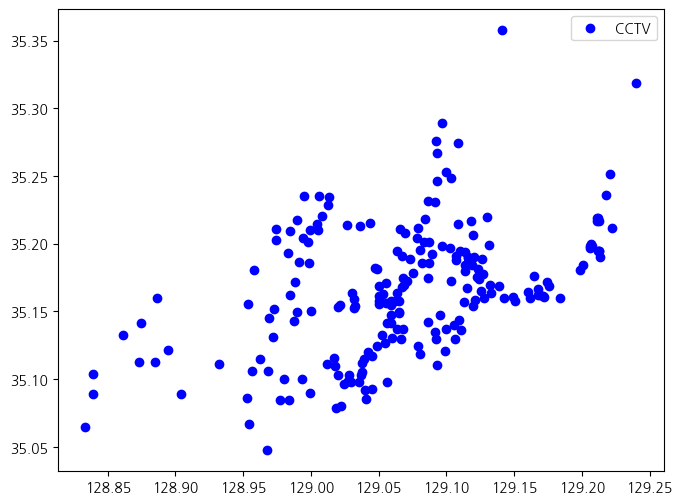

In [34]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
# gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# CCTV 위치 표시
gdf_cctv.plot(ax=ax, color='blue', label='CCTV')

# 신호등 위치 표시
# gdf_진로변경방법위반.plot(ax=ax, color='red', label='진로변경방법위반_busan')

plt.legend()
plt.show()

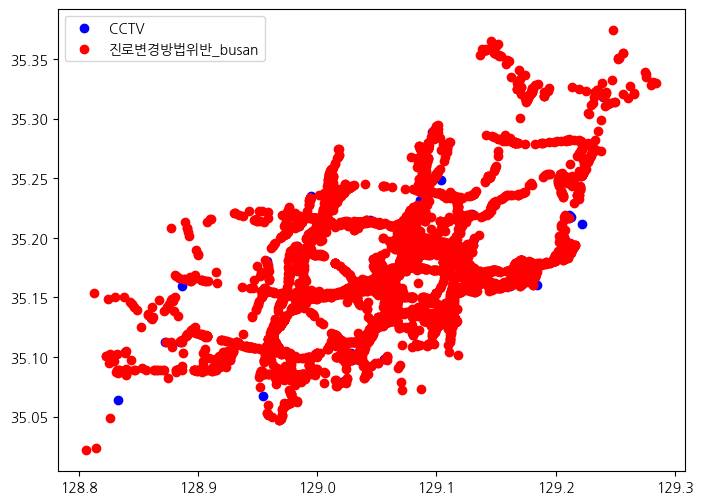

In [33]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# CCTV 위치 표시
gdf_cctv.plot(ax=ax, color='blue', label='CCTV')

# 신호등 위치 표시
gdf_진로변경방법위반.plot(ax=ax, color='red', label='진로변경방법위반_busan')

plt.legend()
plt.show()

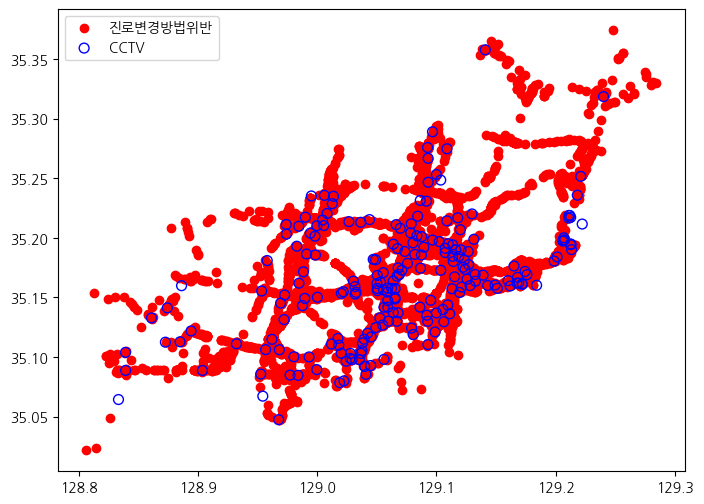

In [41]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 6))

# 진로변경방법위반 위치 표시 (먼저 그림)
gdf_진로변경방법위반.plot(ax=ax, color='red', label='진로변경방법위반')

# CCTV 위치 표시 (나중에 그림)
gdf_cctv.plot(ax=ax, facecolor='none', color='blue', markersize=50,label='CCTV')  # markersize 추가

plt.legend()
plt.show()

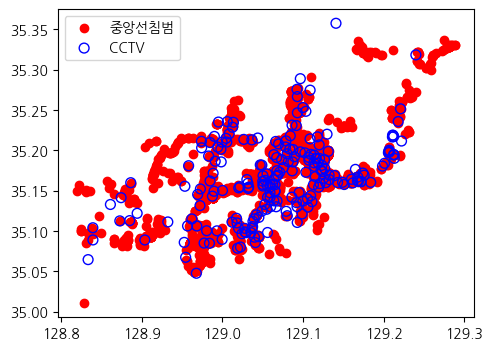

In [58]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(20, 4))

# 중앙선침범 위치 표시 (먼저 그림)
gdf_중앙선침범.plot(ax=ax, color='red', label='중앙선침범')

# CCTV 위치 표시 (나중에 그림)
gdf_cctv.plot(ax=ax, facecolor='none', color='blue', markersize=50,label='CCTV')  # markersize 추가

plt.legend()
plt.show()

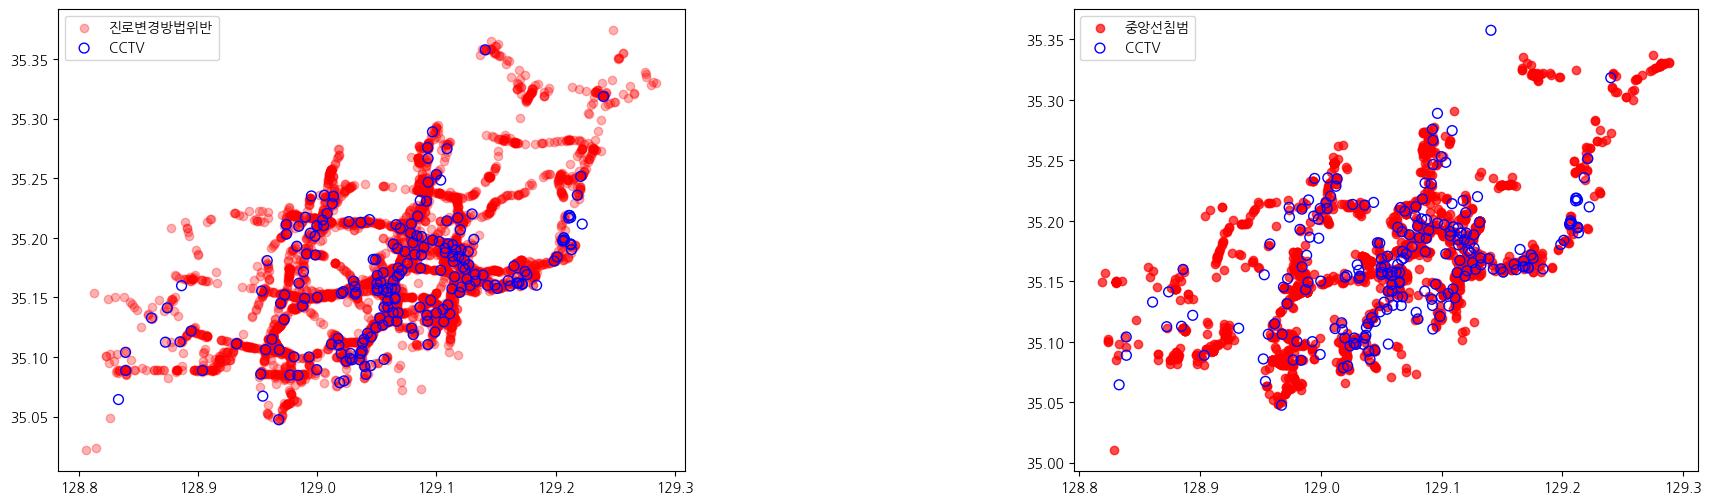

In [82]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))

# 그래프 사이즈 설정 및 1x2 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))  # ncols=2

# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='red', alpha=0.3, label='진로변경방법위반')
gdf_cctv.plot(ax=axs[0], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[1], color='red', alpha=0.7, label='중앙선침범')
gdf_cctv.plot(ax=axs[1], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[1].legend()

plt.show()

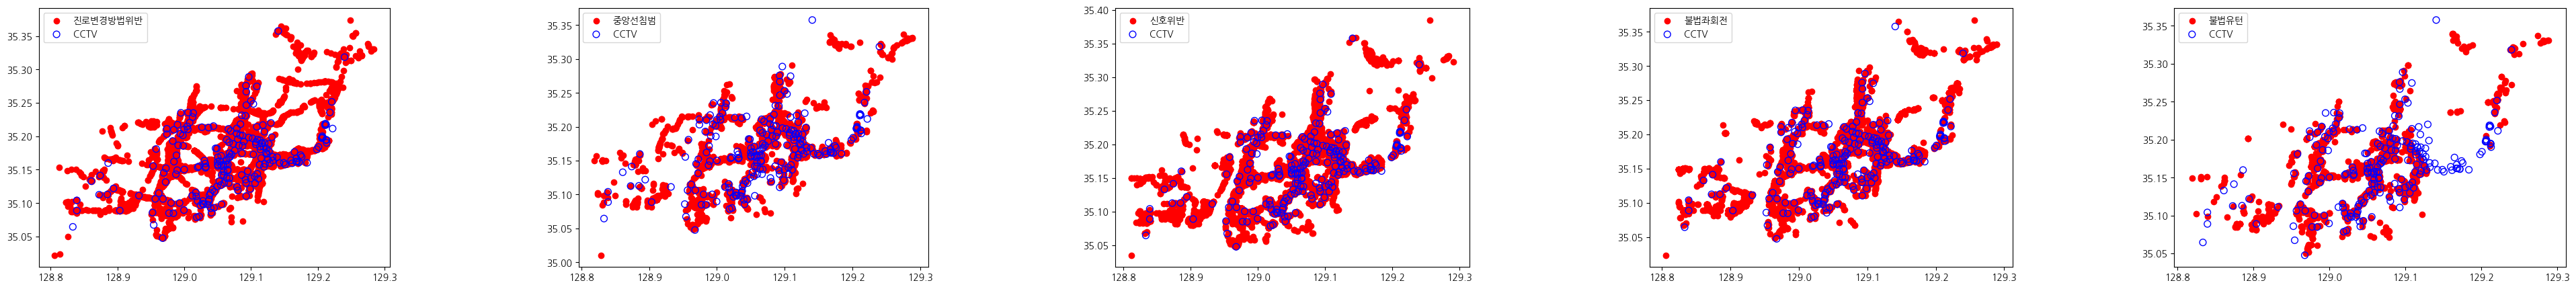

In [9]:
# GeoDataFrame으로 변환
gdf_cctv = gpd.GeoDataFrame(cctv_busan, geometry=gpd.points_from_xy(cctv_busan.lng, cctv_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))
gdf_신호위반 = gpd.GeoDataFrame(신호위반_busan, geometry=gpd.points_from_xy(신호위반_busan.lng, 신호위반_busan.lat))
gdf_불법좌회전 = gpd.GeoDataFrame(불법좌회전_busan, geometry=gpd.points_from_xy(불법좌회전_busan.lng, 불법좌회전_busan.lat))
gdf_불법유턴 = gpd.GeoDataFrame(불법유턴_busan, geometry=gpd.points_from_xy(불법유턴_busan.lng, 불법유턴_busan.lat))

# 그래프 사이즈 설정 및 1x5 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50, 5))  # ncols=5

# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='red', label='진로변경방법위반')
gdf_cctv.plot(ax=axs[0], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[1], color='red', label='중앙선침범')
gdf_cctv.plot(ax=axs[1], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[1].legend()

# 신호위반 위치 표시 (세 번째 서브플롯)
gdf_신호위반.plot(ax=axs[2], color='red', label='신호위반')
gdf_cctv.plot(ax=axs[2], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[2].legend()

# 불법좌회전 위치 표시 (네 번째 서브플롯)
gdf_불법좌회전.plot(ax=axs[3], color='red', label='불법좌회전')
gdf_cctv.plot(ax=axs[3], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[3].legend()

# 불법유턴 위치 표시 (다섯 번째 서브플롯)
gdf_불법유턴.plot(ax=axs[4], color='red', label='불법유턴')
gdf_cctv.plot(ax=axs[4], facecolor='none', color='blue', markersize=50,label='CCTV')  
axs[4].legend()

# 나머지 세 개의 서브플롯도 비슷한 방식으로 그립니다.
# 예를 들어,
# for i in range(2, 5):
#     # 여기서는 임시적으로 '진로변경방법위반' 데이터를 사용합니다.
#     # 실제 사용할 때는 각각 다른 데이터를 사용해야 합니다.
#     gdf_진로변경방법위반.plot(ax=axs[i], color='red', label='진로변경방법위반')
#     gdf_cctv.plot(ax=axs[i], facecolor='none', color='blue', markersize=50,label='CCTV')  
#     axs[i].legend()

plt.ion()  # Interactive mode ON
plt.show()

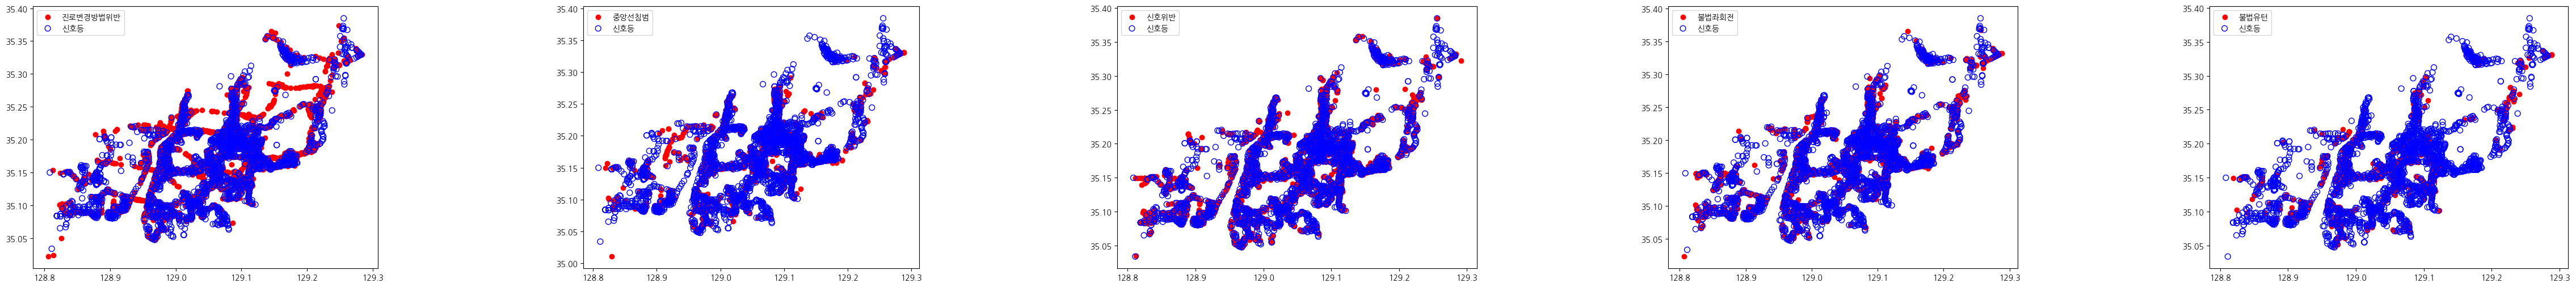

In [74]:
# GeoDataFrame으로 변환
gdf_traffic_light = gpd.GeoDataFrame(신호등_busan, geometry=gpd.points_from_xy(신호등_busan.lng, 신호등_busan.lat))
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))
gdf_신호위반 = gpd.GeoDataFrame(신호위반_busan, geometry=gpd.points_from_xy(신호위반_busan.lng, 신호위반_busan.lat))
gdf_불법좌회전 = gpd.GeoDataFrame(불법좌회전_busan, geometry=gpd.points_from_xy(불법좌회전_busan.lng, 불법좌회전_busan.lat))
gdf_불법유턴 = gpd.GeoDataFrame(불법유턴_busan, geometry=gpd.points_from_xy(불법유턴_busan.lng, 불법유턴_busan.lat))

# 그래프 사이즈 설정 및 1x5 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(60, 6))  # ncols=5

# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='red', label='진로변경방법위반') 
gdf_traffic_light.plot(ax=axs[0], facecolor='none', color='blue', markersize=50,label='신호등')  
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[1], color='red', label='중앙선침범')
gdf_traffic_light.plot(ax=axs[1], facecolor='none', color='blue', markersize=50,label='신호등')  
axs[1].legend()

# 신호위반 위치 표시 (세 번째 서브플롯)
gdf_신호위반.plot(ax=axs[2], color='red', label='신호위반')
gdf_traffic_light.plot(ax=axs[2], facecolor='none', color='blue', markersize=50,label='신호등')  
axs[2].legend()

# 불법좌회전 위치 표시 (네 번째 서브플롯)
gdf_불법좌회전.plot(ax=axs[3], color='red', label='불법좌회전')
gdf_traffic_light.plot(ax=axs[3], facecolor='none', color='blue', markersize=50,label='신호등')  
axs[3].legend()

# 불법유턴 위치 표시 (다섯 번째 서브플롯)
gdf_불법유턴.plot(ax=axs[4], color='red', label='불법유턴')
gdf_traffic_light.plot(ax=axs[4], facecolor='none', color='blue', markersize=50,label='신호등')  
axs[4].legend()

# 나머지 세 개의 서브플롯도 비슷한 방식으로 그립니다.
# 예를 들어,
# for i in range(2, 5):
#     # 여기서는 임시적으로 '진로변경방법위반' 데이터를 사용합니다.
#     # 실제 사용할 때는 각각 다른 데이터를 사용해야 합니다.
#     gdf_진로변경방법위반.plot(ax=axs[i], color='red', label='진로변경방법위반')
#     gdf_cctv.plot(ax=axs[i], facecolor='none', color='blue', markersize=50,label='CCTV')  
#     axs[i].legend()

plt.show()

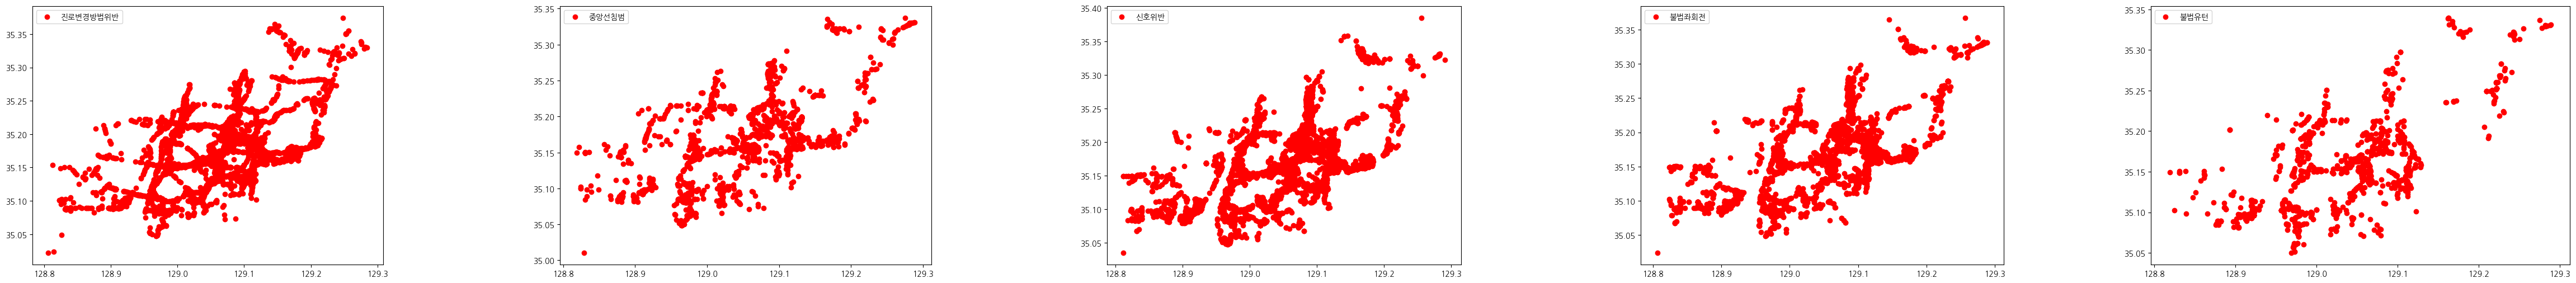

In [77]:
# GeoDataFrame으로 변환
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))
gdf_신호위반 = gpd.GeoDataFrame(신호위반_busan, geometry=gpd.points_from_xy(신호위반_busan.lng, 신호위반_busan.lat))
gdf_불법좌회전 = gpd.GeoDataFrame(불법좌회전_busan, geometry=gpd.points_from_xy(불법좌회전_busan.lng, 불법좌회전_busan.lat))
gdf_불법유턴 = gpd.GeoDataFrame(불법유턴_busan, geometry=gpd.points_from_xy(불법유턴_busan.lng, 불법유턴_busan.lat))

# 그래프 사이즈 설정 및 1x5 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(60, 6))  # ncols=5

# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='red', label='진로변경방법위반') 
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[1], color='red', label='중앙선침범')
axs[1].legend()

# 신호위반 위치 표시 (세 번째 서브플롯)
gdf_신호위반.plot(ax=axs[2], color='red', label='신호위반')
axs[2].legend()

# 불법좌회전 위치 표시 (네 번째 서브플롯)
gdf_불법좌회전.plot(ax=axs[3], color='red', label='불법좌회전')
axs[3].legend()

# 불법유턴 위치 표시 (다섯 번째 서브플롯)
gdf_불법유턴.plot(ax=axs[4], color='red', label='불법유턴')
axs[4].legend()

# 나머지 세 개의 서브플롯도 비슷한 방식으로 그립니다.
# 예를 들어,
# for i in range(2, 5):
#     # 여기서는 임시적으로 '진로변경방법위반' 데이터를 사용합니다.
#     # 실제 사용할 때는 각각 다른 데이터를 사용해야 합니다.
#     gdf_진로변경방법위반.plot(ax=axs[i], color='red', label='진로변경방법위반')
#     gdf_cctv.plot(ax=axs[i], facecolor='none', color='blue', markersize=50,label='CCTV')  
#     axs[i].legend()

plt.show()

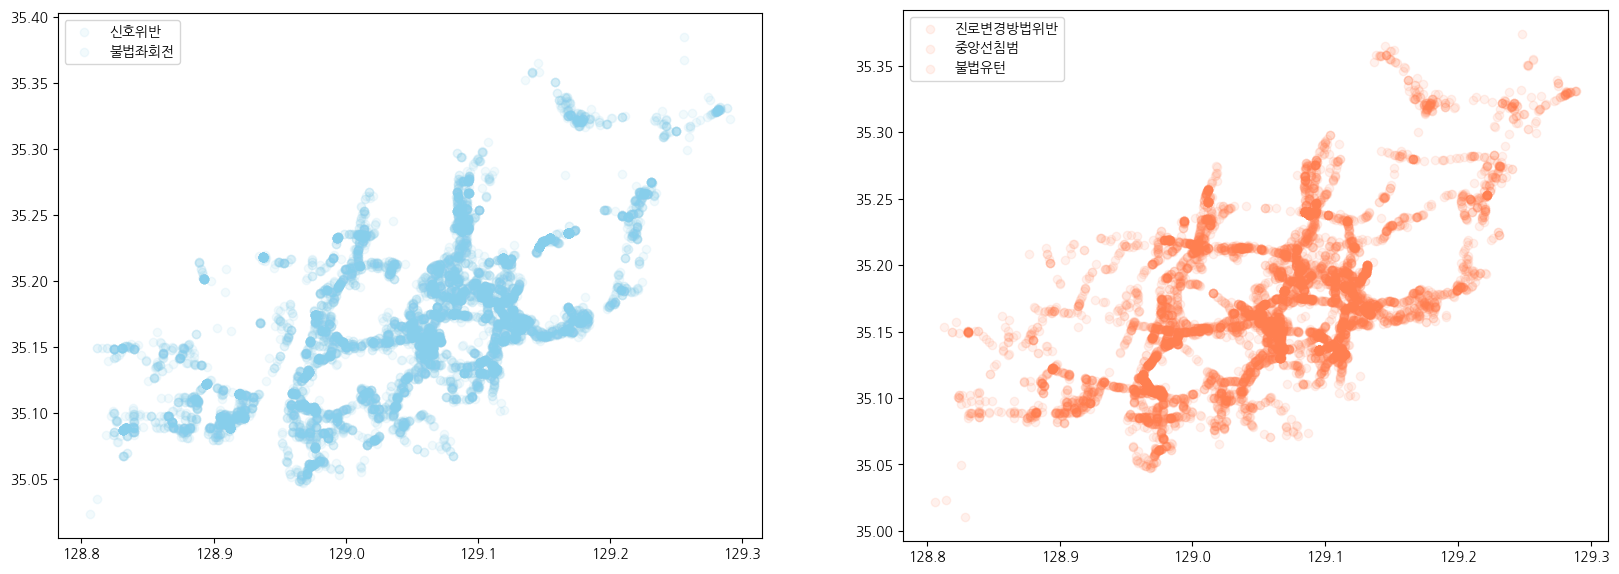

In [10]:
# GeoDataFrame으로 변환
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))
gdf_신호위반 = gpd.GeoDataFrame(신호위반_busan, geometry=gpd.points_from_xy(신호위반_busan.lng, 신호위반_busan.lat))
gdf_불법좌회전 = gpd.GeoDataFrame(불법좌회전_busan, geometry=gpd.points_from_xy(불법좌회전_busan.lng, 불법좌회전_busan.lat))
gdf_불법유턴 = gpd.GeoDataFrame(불법유턴_busan, geometry=gpd.points_from_xy(불법유턴_busan.lng, 불법유턴_busan.lat))

# 그래프 사이즈 설정 및 1x10 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))  # ncols=2

gdf_신호위반.plot(ax=axs[0], color='skyblue', alpha=0.1, label='신호위반')
gdf_불법좌회전.plot(ax=axs[0], color='skyblue', alpha=0.1, label='불법좌회전') 
axs[0].legend()

gdf_진로변경방법위반.plot(ax=axs[1], color='coral', alpha=0.1, label='진로변경방법위반')
gdf_중앙선침범.plot(ax=axs[1], color='coral', alpha=0.1, label='중앙선침범')
gdf_불법유턴.plot(ax=axs[1], color='coral', alpha=0.1, label='불법유턴')   
axs[1].legend()


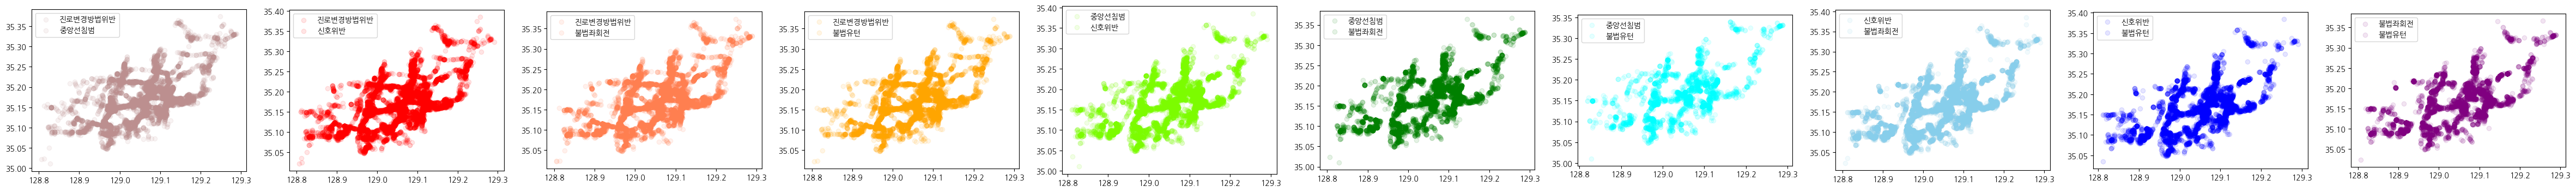

In [15]:
# GeoDataFrame으로 변환
gdf_진로변경방법위반 = gpd.GeoDataFrame(진로변경방법위반_busan, geometry=gpd.points_from_xy(진로변경방법위반_busan.lng, 진로변경방법위반_busan.lat))
gdf_중앙선침범 = gpd.GeoDataFrame(중앙선침범_busan, geometry=gpd.points_from_xy(중앙선침범_busan.lng, 중앙선침범_busan.lat))
gdf_신호위반 = gpd.GeoDataFrame(신호위반_busan, geometry=gpd.points_from_xy(신호위반_busan.lng, 신호위반_busan.lat))
gdf_불법좌회전 = gpd.GeoDataFrame(불법좌회전_busan, geometry=gpd.points_from_xy(불법좌회전_busan.lng, 불법좌회전_busan.lat))
gdf_불법유턴 = gpd.GeoDataFrame(불법유턴_busan, geometry=gpd.points_from_xy(불법유턴_busan.lng, 불법유턴_busan.lat))

# 그래프 사이즈 설정 및 1x10 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(60, 6))  # ncols=5


# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='rosybrown', alpha=0.1, label='진로변경방법위반')
gdf_중앙선침범.plot(ax=axs[0], color='rosybrown', alpha=0.1, label='중앙선침범')   
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[1], color='red', alpha=0.1, label='진로변경방법위반')
gdf_신호위반.plot(ax=axs[1], color='red', alpha=0.1, label='신호위반')  
axs[1].legend()

# 신호위반 위치 표시 (세 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[2], color='coral', alpha=0.1, label='진로변경방법위반')
gdf_불법좌회전.plot(ax=axs[2], color='coral', alpha=0.1, label='불법좌회전')  
axs[2].legend()

# 불법좌회전 위치 표시 (네 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[3], color='orange', alpha=0.1, label='진로변경방법위반')
gdf_불법유턴.plot(ax=axs[3], color='orange', alpha=0.1, label='불법유턴')  
axs[3].legend()

# 불법유턴 위치 표시 (다섯 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[4], color='lawngreen', alpha=0.1, label='중앙선침범')
gdf_신호위반.plot(ax=axs[4], color='lawngreen', alpha=0.1, label='신호위반')  
axs[4].legend()

gdf_중앙선침범.plot(ax=axs[5], color='green', alpha=0.1, label='중앙선침범')
gdf_불법좌회전.plot(ax=axs[5], color='green', alpha=0.1, label='불법좌회전')  
axs[5].legend()

gdf_중앙선침범.plot(ax=axs[6], color='aqua', alpha=0.1, label='중앙선침범')
gdf_불법유턴.plot(ax=axs[6], color='aqua', alpha=0.1, label='불법유턴')  
axs[6].legend()

gdf_신호위반.plot(ax=axs[7], color='skyblue', alpha=0.1, label='신호위반')
gdf_불법좌회전.plot(ax=axs[7], color='skyblue', alpha=0.1, label='불법좌회전') 
axs[7].legend()

gdf_신호위반.plot(ax=axs[8], color='blue', alpha=0.1, label='신호위반')
gdf_불법유턴.plot(ax=axs[8], color='blue', alpha=0.1, label='불법유턴')  
axs[8].legend()

gdf_불법좌회전.plot(ax=axs[9], color='purple', alpha=0.1, label='불법좌회전')
gdf_불법유턴.plot(ax=axs[9], color='purple', alpha=0.1, label='불법유턴')  
axs[9].legend()



plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


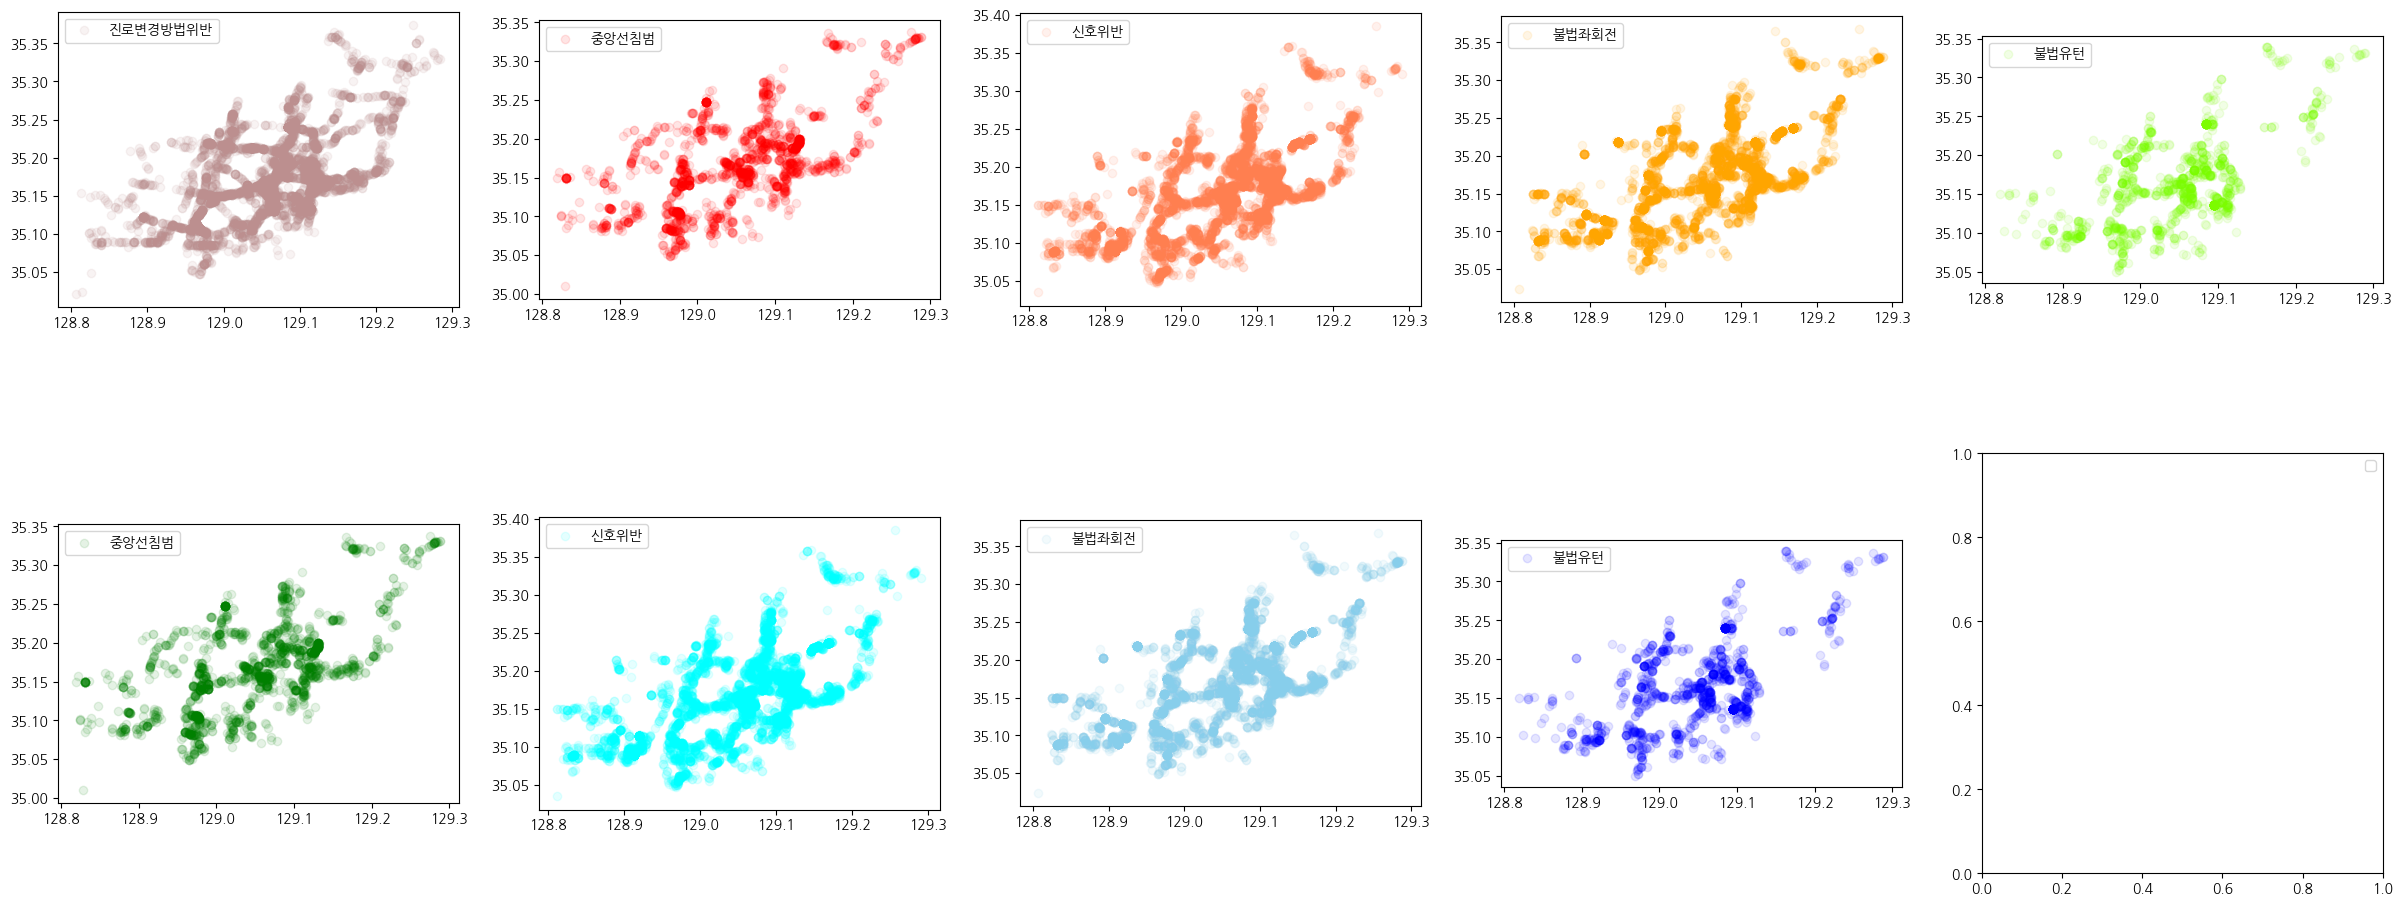

In [19]:
# 그래프 사이즈 설정 및 2x5 서브플롯 생성
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))

# 첫 번째 행
gdf_진로변경방법위반.plot(ax=axs[0][0], color='rosybrown', alpha=0.1, label='진로변경방법위반')
gdf_중앙선침범.plot(ax=axs[0][1], color='red', alpha=0.1, label='중앙선침범')   
gdf_신호위반.plot(ax=axs[0][2], color='coral', alpha=0.1, label='신호위반')
gdf_불법좌회전.plot(ax=axs[0][3], color='orange', alpha=0.1, label='불법좌회전')
gdf_불법유턴.plot(ax=axs[0][4], color='lawngreen', alpha=0.1, label='불법유턴')

# 두 번째 행
gdf_중앙선침범.plot(ax=axs[1][0], color='green', alpha=0.1, label='중앙선침범')
gdf_신호위반.plot(ax=axs[1][1], color="aqua",alpha = 0.1,label = '신호위반') 
gdf_불법좌회전.plot(ax=axs[1][2], color="skyblue",alpha = 0.1,label = '불법좌회전') 
gdf_불법유턴.plot(ax=axs[1][3],color="blue",alpha = 0.1,label = '불법유턴') 

for i in range(5):
    axs[0,i].legend()
    axs[1,i].legend()

plt.show()

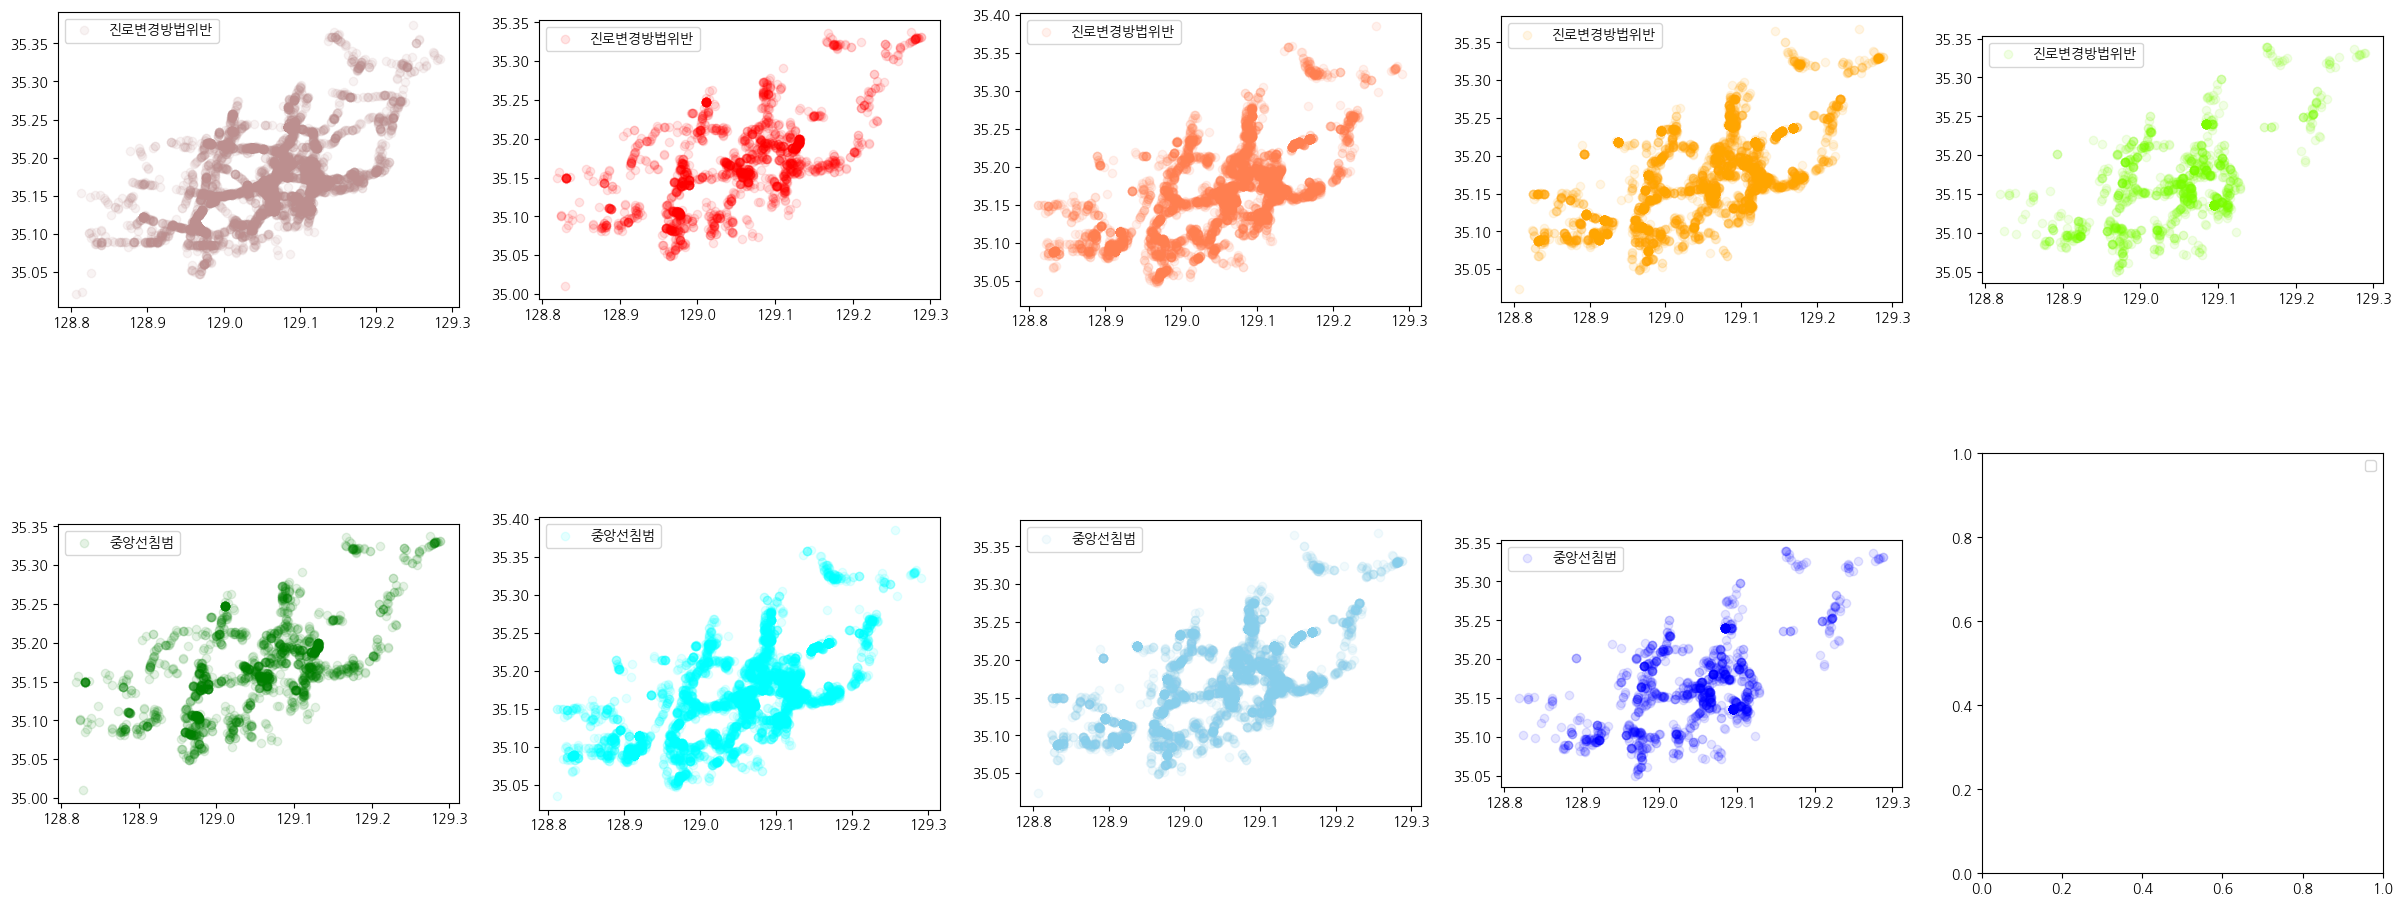

In [21]:
# 그래프 사이즈 설정 및 2x5 서브플롯 생성
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))

# 첫 번째 행
gdf_진로변경방법위반.plot(ax=axs[0][0], color='rosybrown', alpha=0.1)
gdf_중앙선침범.plot(ax=axs[0][1], color='red', alpha=0.1)   
gdf_신호위반.plot(ax=axs[0][2], color='coral', alpha=0.1)
gdf_불법좌회전.plot(ax=axs[0][3], color='orange', alpha=0.1)
gdf_불법유턴.plot(ax=axs[0][4], color='lawngreen', alpha=0.1)

# 두 번째 행
gdf_중앙선침범.plot(ax=axs[1][0], color='green', alpha=0.1)
gdf_신호위반.plot(ax=axs[1][1], color="aqua",alpha = 0.1) 
gdf_불법좌회전.plot(ax=axs[1][2], color="skyblue",alpha = 0.1) 
gdf_불법유턴.plot(ax=axs[1][3],color="blue",alpha = 0.1) 

for i in range(5):
    axs[0,i].legend(['진로변경방법위반'])
    axs[1,i].legend(['중앙선침범'])

plt.show()

In [1]:
from sklearn.cluster import KMeans

In [11]:
# '진로변경방법위반' 데이터에 대한 군집화
data = 진로변경방법위반_busan[['lng', 'lat']]

# KMeans 객체 생성 (여기서는 5개의 클러스터를 생성)
kmeans = KMeans(n_clusters=5)

# 군집화 수행
kmeans.fit(data)

# 결과 레이블 가져오기
labels = kmeans.labels_

# 원본 DataFrame에 'cluster' 열 추가
진로변경방법위반_busan['cluster'] = labels

# 결과 확인
print(진로변경방법위반_busan.head())

C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    월   일        lat         lng                    주소  \
0  12  31  35.150239  129.058649  부산광역시 부산진구 범천동 943번길   
1  12  31  35.195890  129.080090    부산광역시 연제구 거제동 72번길   
2  12  31  35.183910  129.201086  부산광역시 해운대구 송정동 451번길   
3  12  31  35.196015  129.080049    부산광역시 연제구 거제동 72번길   
4  12  31  35.185579  129.087269  부산광역시 연제구 연산동 1530번길   

                          geometry  cluster  
0  POINT (129.0586493 35.15023919)        4  
1  POINT (129.0800895 35.19589011)        0  
2  POINT (129.2010859 35.18391005)        0  
3  POINT (129.0800488 35.19601472)        0  
4    POINT (129.0872688 35.185579)        0  


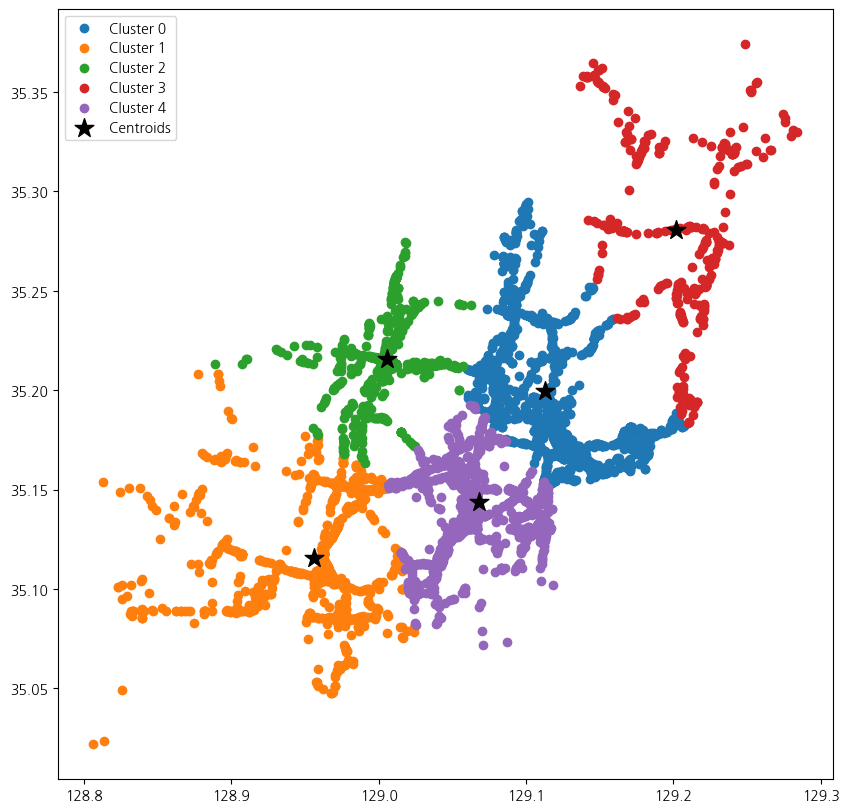

In [12]:
# 산점도로 데이터 표시
plt.figure(figsize=(10, 10))

for i in range(kmeans.n_clusters):
    cluster = 진로변경방법위반_busan[진로변경방법위반_busan['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

# 클러스터 중심 위치 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.legend()
plt.show()

C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


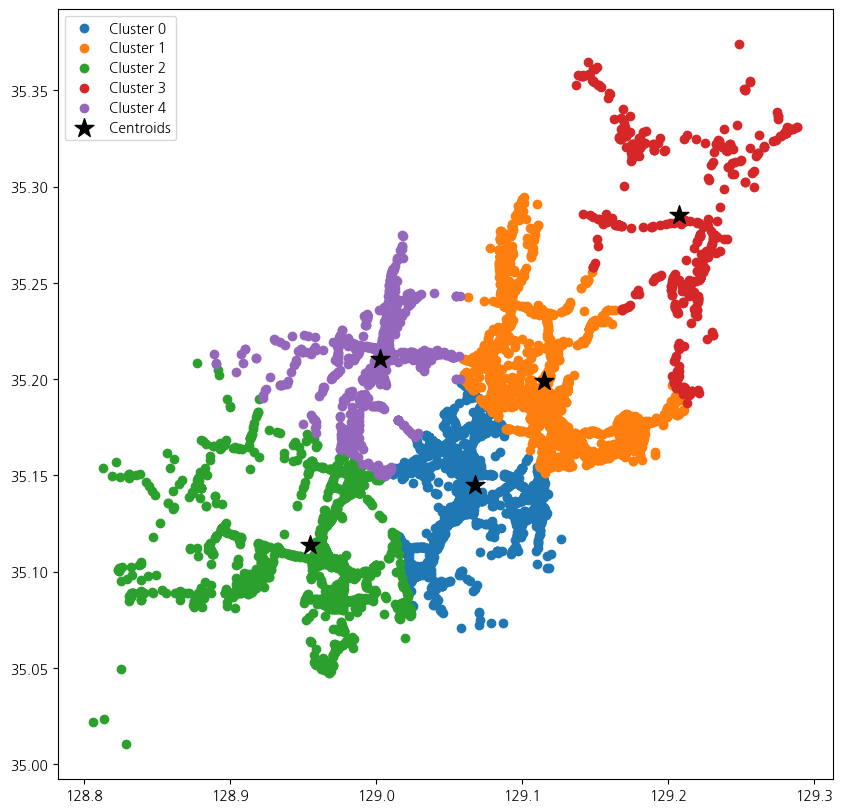

In [13]:
# 진로변경방법위반_busan과 중앙선침범_busan이라는 두 DataFrame이 있다고 가정
# 각 DataFrame에는 'lng', 'lat', 그리고 해당 사건 발생 횟수('count')가 포함되어 있다고 가정

# 두 DataFrame 합치기
total_data = pd.concat([진로변경방법위반_busan, 중앙선침범_busan])

# KMeans 객체 생성 및 군집화 수행
kmeans = KMeans(n_clusters=5)
kmeans.fit(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
labels = kmeans.labels_
total_data['cluster'] = labels

# 산점도로 데이터 표시 (2D)
plt.figure(figsize=(10, 10))

for i in range(kmeans.n_clusters):
    cluster = total_data[total_data['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

# 클러스터 중심 위치 표시 (2D)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.legend()
plt.show()

C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


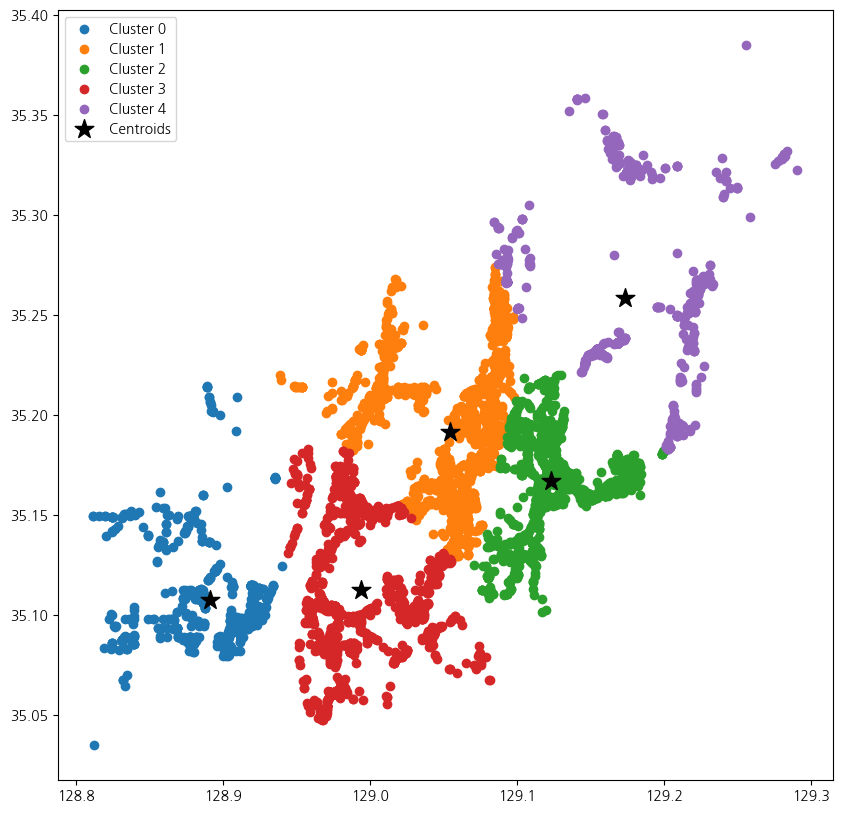

In [14]:
# CCTV_data와 신호위반_data가 있다고 가정합니다.
# 각 DataFrame에는 'lng'와 'lat'라는 이름의 경도와 위도 정보가 포함되어 있다고 가정합니다.

# 두 DataFrame 합치기
total_data = pd.concat([cctv_busan, 신호위반_busan])

# KMeans 객체 생성 및 군집화 수행
kmeans = KMeans(n_clusters=5)
kmeans.fit(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
labels = kmeans.labels_
total_data['cluster'] = labels

# 산점도로 데이터 표시 (2D)
plt.figure(figsize=(10, 10))

for i in range(kmeans.n_clusters):
    cluster = total_data[total_data['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

# 클러스터 중심 위치 표시 (2D)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.legend()
plt.show()

# 위 코드로 나온 결론

1. 교통사고 위험 지역의 식별: 군집화 결과를 통해 교통사고(여기서는 신호 위반 사건)가 자주 발생하는 지역을 식별할 수 있습니다. 이러한 지역은 보다 집중적인 교통 안전 대책이 필요할 수 있습니다.

2. CCTV 설치의 적절성 평가: CCTV 설치 위치와 교통사고 발생 위치의 관계를 파악함으로써, 현재 CCTV 설치 상황이 적절한지 평가할 수 있습니다. 
   예를 들어, 특정 클러스터에서 CCTV 설치 비율이 낮고 사고 발생률이 높다면, 해당 지역에 추가적인 CCTV 설치가 필요하다는 결론을 도출할 수 있습니다.

3. CCTV 배치 최적화 방안 도출: 더 나아가, 각 클러스터 내에서도 CCTV와 사건 발생 위치의 분포 패턴을 분석하여, 보다 효과적인 CCTV 배치 전략을 제시할 수 있습니다.

* 이 코드는 단순히 'lng'와 'lat' 두 개의 변수만 고려하여 군집화를 수행, 인구밀도와 같은 데이터를 추가함으로써 조금 더 디테일을 살릴 수도 있음(아마도......) 

C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


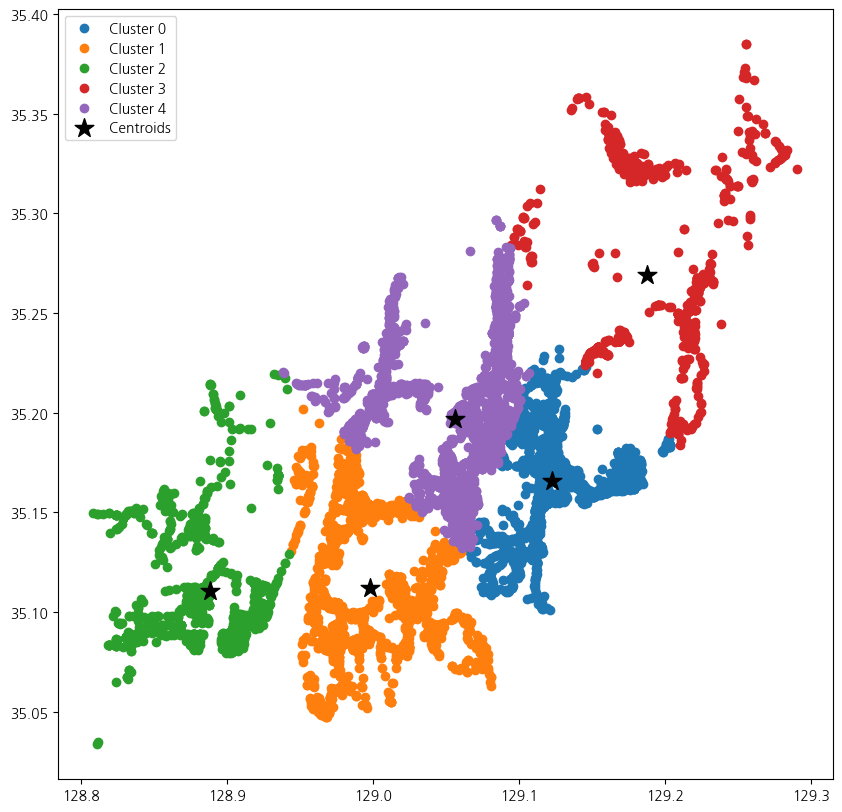

In [15]:
## 신호등 데이터와 신호위반 데이터

# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, 신호위반_busan])

# KMeans 객체 생성 및 군집화 수행
kmeans = KMeans(n_clusters=5)
kmeans.fit(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
labels = kmeans.labels_
total_data['cluster'] = labels

# 산점도로 데이터 표시 (2D)
plt.figure(figsize=(10, 10))

for i in range(kmeans.n_clusters):
    cluster = total_data[total_data['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

# 클러스터 중심 위치 표시 (2D)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.legend()
plt.show()

# 위 코드로 나온 결론

1. 신호 위반 사건의 주요 발생 지역 파악: 군집화 결과를 통해 신호 위반 사건이 주로 발생하는 지역을 파악할 수 있습니다. 이는 해당 지역에 대한 보다 집중적인 교통 안전 대책 마련에 도움이 됩니다.

2. 신호등 배치의 적절성 평가: 현재의 신호등 배치가 신호 위반 사건을 예방하는 데 적절한지 평가할 수 있습니다. 
   예를 들어, 일부 클러스터에서는 신호등이 잘 배치되어 있지만 여전히 높은 수의 신호 위반이 발생한다면, 단순히 추가적인 신호등 설치보다는 다른 유형의 대책이 필요할 수 있음을 시사합니다.
   
3. 신호등 설치 최적화 방안 제시: 각 클러스터 내에서도 신호등과 사고 발생 위치의 분포 패턴을 분석하여, 보다 효과적인 신호등 배치 전략을 제시할 수 있습니다.

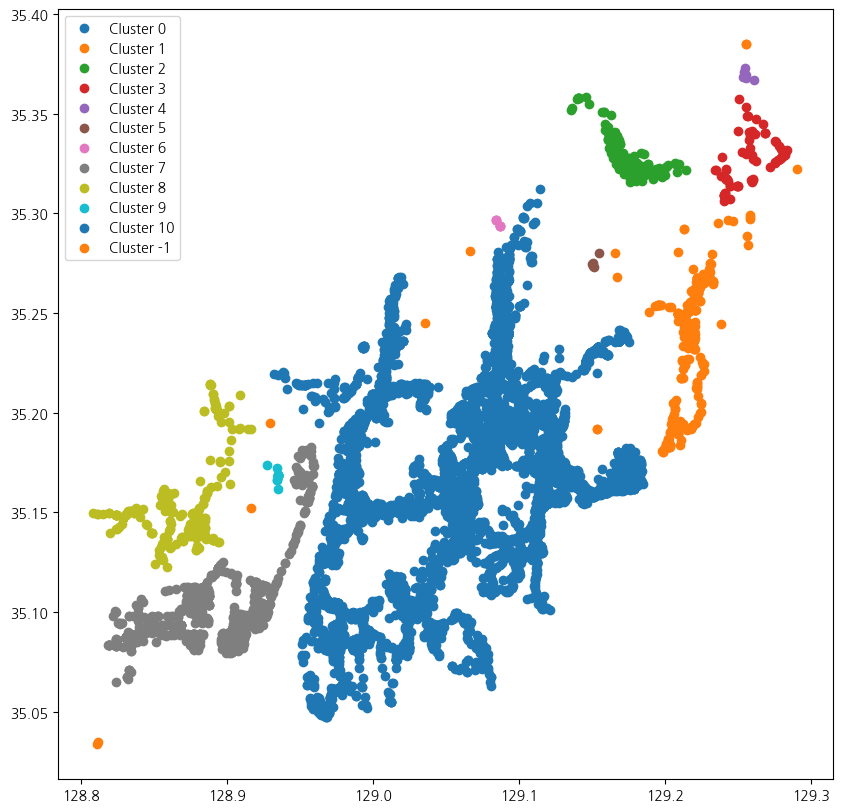

In [8]:
# 신호등_data와 신호위반_data가 있다고 가정합니다.
# 각 DataFrame에는 'lng'와 'lat'라는 이름의 경도와 위도 정보가 포함되어 있다고 가정합니다.

# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, 신호위반_busan])

# DBSCAN 객체 생성 및 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
total_data['cluster'] = labels

# 산점도로 데이터 표시 (2D)
plt.figure(figsize=(10, 10))

for i in set(labels):
    cluster = total_data[total_data['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

plt.legend()
plt.show()

1. 신호 위반 주요 발생 지역 식별: DBSCAN은 밀도 기반의 클러스터링 알고리즘이므로, 데이터 포인트가 밀집되어 있는 지역, 즉 신호 위반 사건이 빈번하게 발생하는 지역을 잘 찾아낼 수 있습니다. 이러한 정보는 교통 안전 대책 마련에 중요한 참고 자료가 될 수 있습니다.

2. 신호등 배치의 적절성 평가: 현재의 신호등 배치와 신호 위반 사건 발생 패턴 간의 관계를 파악하여, 현재 신호등 설치 상황이 적절한지 평가할 수 있습니다.

3. 노이즈 포인트 분석: DBSCAN은 노이즈 포인트(클러스터에 속하지 않는 점)까지 고려합니다. 이 노이즈 포인트들은 예외적으로 많은 사고가 발생하거나, 반대로 예외적으로 낮은 사고 발생률을 보이는 지역일 가능성이 있습니다. 이런 특별한 경우들을 파악하는 것 역시 중요한 인사이트를 제공할 수 있습니다.

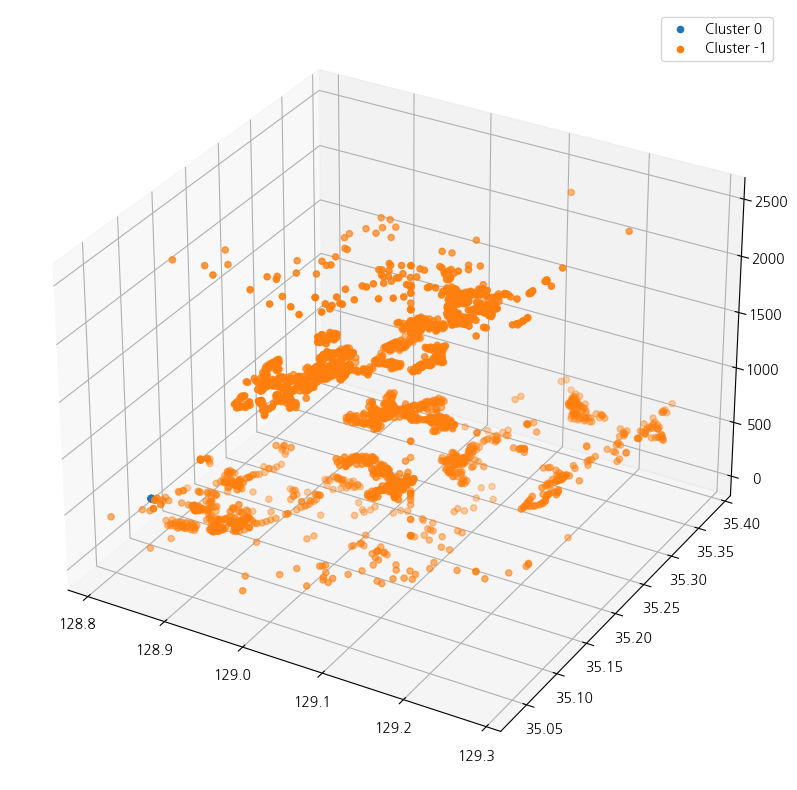

In [18]:
# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, cctv_busan])

# address 정보를 숫자로 변환 (Label Encoding)
le = LabelEncoder()
total_data['address_encoded'] = le.fit_transform(total_data['address'])

# DBSCAN 객체 생성 및 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(total_data[['lng', 'lat', 'address_encoded']])

# 결과 레이블 가져오기 및 DataFrame에 추가
total_data['cluster'] = labels

# 산점도로 데이터 표시 (3D)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in set(labels):
    cluster = total_data[total_data['cluster'] == i]
    ax.scatter(cluster['lng'], cluster['lat'], cluster['address_encoded'], label=f'Cluster {i}')

plt.legend()
plt.show()

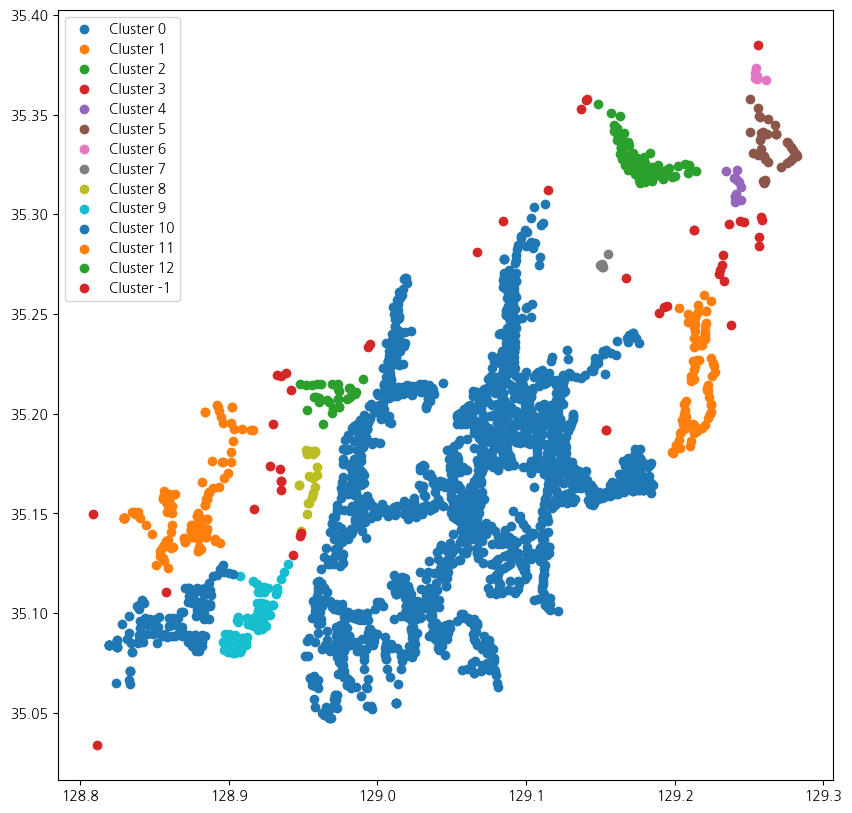

Cluster 0 addresses:
address
부산광역시 사하구 다대1동 113        4
부산광역시 사상구 모라2동 1339-22    3
부산광역시 남구 용호동 176-23       3
부산광역시                     3
부산광역시 북구 화명3동 2306        3
                         ..
부산광역시 사하구 신평2동 370-31     1
부산광역시 사하구 장림1동 1033-2     1
부산광역시 사하구 신평1동 569-1      1
부산광역시 사하구 장림2동 91         1
사직운동장                     1
Name: count, Length: 1888, dtype: int64
Cluster 1 addresses:
address
부산광역시 해운대구 송정동 106-7       1
부산광역시 기장군 기장읍 청강리 284-3    1
부산광역시 기장군 기장읍 동부리 305-1    1
부산광역시 기장군 기장읍 동부리 113-5    1
부산광역시 기장군 기장읍 동부리 261-1    1
                          ..
부산광역시 기장군 기장읍 청강리 522-2    1
부산광역시 기장군 기장읍 청강리 693      1
부산광역시 기장군 기장읍 석산리 113-5    1
부산광역시 기장군 기장읍 내리 775-6     1
송정1호교                      1
Name: count, Length: 83, dtype: int64
Cluster 2 addresses:
address
부산광역시 기장군 정관면 용수리 1387      2
부산광역시 기장군 정관면 용수리 1357      2
부산광역시 기장군 정관면 모전리 789       2
부산광역시 기장군 정관읍 정관덕산길 61      1
부산광역시 기장군 정관면 용수리 1363      1
                           ..
부산광역시 기장군 정관면 용수리 1364      

In [19]:
# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, cctv_busan])

# DBSCAN 객체 생성 및 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
total_data['cluster'] = labels

# 산점도로 데이터 표시 (2D)
plt.figure(figsize=(10, 10))

for i in set(labels):
    cluster = total_data[total_data['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

plt.legend()
plt.show()

# 각 클러스터 내 주소 분포 확인하기
for i in set(labels):
    print(f"Cluster {i} addresses:")
    print(total_data[total_data['cluster'] == i]['address'].value_counts())

C:\Users\82108\AppData\Local\Temp\ipykernel_30688\2615332051.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(total_data['gu'].unique()))
C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


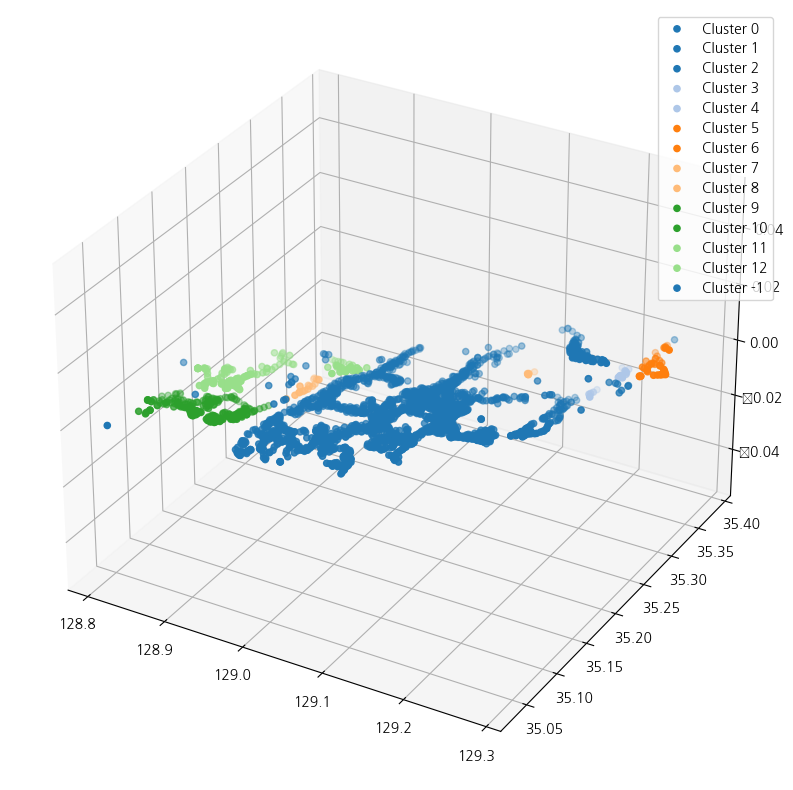

In [20]:
# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, cctv_busan])

# DBSCAN 객체 생성 및 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
total_data['cluster'] = labels

# address 정보에서 구 이름 추출하기 (예: "부산광역시 해운대구 우동" -> "해운대구")
total_data['gu'] = total_data['address'].str.split().str[1]

# gu별로 다른 색상 할당하기 위한 colormap 생성하기 
colormap = plt.cm.get_cmap('tab20', len(total_data['gu'].unique()))

# 3D 산점도로 데이터 표시하기 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in set(labels):
    cluster = total_data[total_data['cluster'] == i]
    ax.scatter(cluster['lng'], cluster['lat'], c=[colormap(i) for _ in range(len(cluster))], label=f'Cluster {i}')

plt.legend()
plt.show()

C:\Users\82108\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


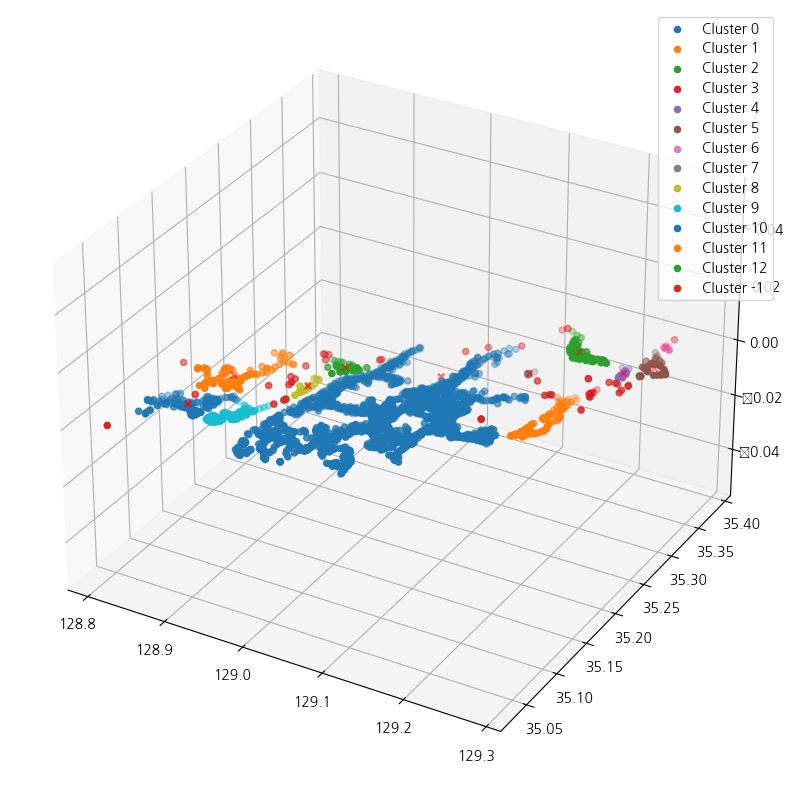

In [21]:
# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, cctv_busan])

# DBSCAN 객체 생성 및 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
total_data['cluster'] = labels

# 각 클러스터의 중심점 계산하기 
cluster_centers = total_data.groupby('cluster')[['lng', 'lat']].mean()

# 3D 산점도로 데이터 표시하기 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in set(labels):
    cluster = total_data[total_data['cluster'] == i]
    ax.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

# 클러스터 중심 표시하기 (빨간색 X 마크)
ax.scatter(cluster_centers['lng'], cluster_centers['lat'], c='red', marker='x')

plt.legend()
plt.show()

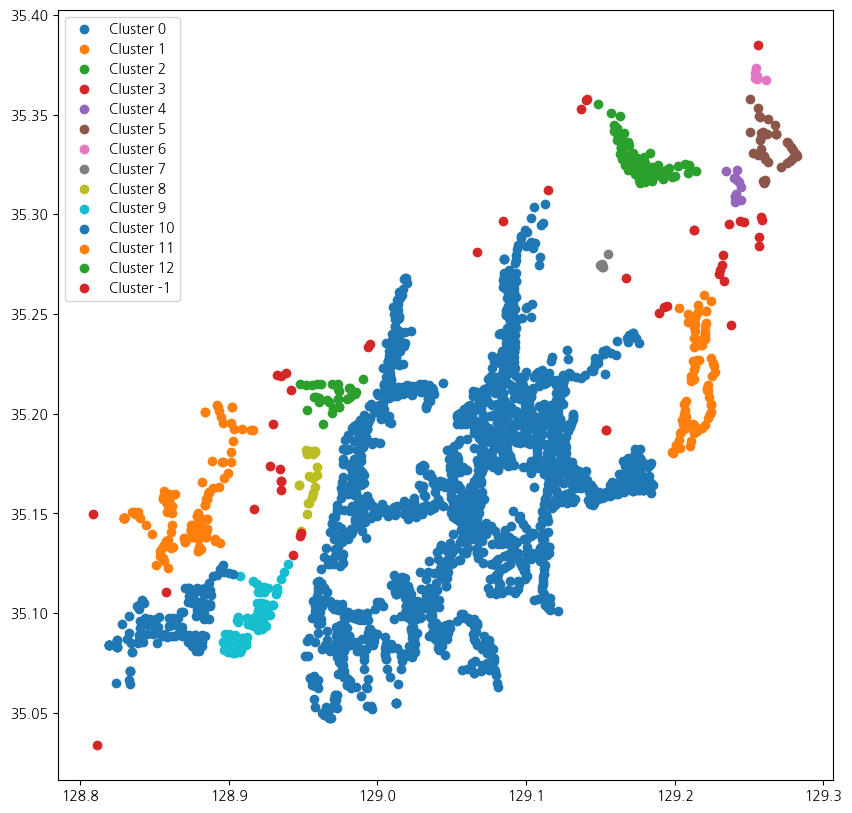

Cluster 0 addresses:
address
부산광역시 사하구 다대1동 113        4
부산광역시 사상구 모라2동 1339-22    3
부산광역시 남구 용호동 176-23       3
부산광역시                     3
부산광역시 북구 화명3동 2306        3
                         ..
부산광역시 사하구 신평2동 370-31     1
부산광역시 사하구 장림1동 1033-2     1
부산광역시 사하구 신평1동 569-1      1
부산광역시 사하구 장림2동 91         1
사직운동장                     1
Name: count, Length: 1888, dtype: int64
Cluster 1 addresses:
address
부산광역시 해운대구 송정동 106-7       1
부산광역시 기장군 기장읍 청강리 284-3    1
부산광역시 기장군 기장읍 동부리 305-1    1
부산광역시 기장군 기장읍 동부리 113-5    1
부산광역시 기장군 기장읍 동부리 261-1    1
                          ..
부산광역시 기장군 기장읍 청강리 522-2    1
부산광역시 기장군 기장읍 청강리 693      1
부산광역시 기장군 기장읍 석산리 113-5    1
부산광역시 기장군 기장읍 내리 775-6     1
송정1호교                      1
Name: count, Length: 83, dtype: int64
Cluster 2 addresses:
address
부산광역시 기장군 정관면 용수리 1387      2
부산광역시 기장군 정관면 용수리 1357      2
부산광역시 기장군 정관면 모전리 789       2
부산광역시 기장군 정관읍 정관덕산길 61      1
부산광역시 기장군 정관면 용수리 1363      1
                           ..
부산광역시 기장군 정관면 용수리 1364      

In [22]:
# 두 DataFrame 합치기
total_data = pd.concat([신호등_busan, cctv_busan])

# DBSCAN 객체 생성 및 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan.fit_predict(total_data[['lng', 'lat']])

# 결과 레이블 가져오기 및 DataFrame에 추가
total_data['cluster'] = labels

# 산점도로 데이터 표시 (2D)
plt.figure(figsize=(10, 10))

for i in set(labels):
    cluster = total_data[total_data['cluster'] == i]
    plt.scatter(cluster['lng'], cluster['lat'], label=f'Cluster {i}')

plt.legend()
plt.show()

# 각 클러스터 내 주소 분포 확인하기
for i in set(labels):
    print(f"Cluster {i} addresses:")
    print(total_data[total_data['cluster'] == i]['address'].value_counts())

* 군집화와 시각화를 통한 결과 해석이 가장 명확한 결론을 도출하는 코드로 볼 수 있습니다.

위 코드는 DBSCAN 알고리즘을 사용하여 데이터를 군집화하고, 이를 시각적으로 표현합니다. 그리고 각 클러스터 내에서 가장 많이 등장하는 주소들을 출력하여, 각 클러스터가 어떤 지역을 대표하는지 추론합니다.

따라서 이 코드는 다음과 같은 결론을 도출합니다:

1. 'lng'와 'lat' 기반으로 데이터가 어떻게 군집화되는지 시각적으로 확인할 수 있다.

2. 각 클러스터가 대표하는 지역(주소)를 파악할 수 있다.
이처럼 군집화 알고리즘의 결과를 해석하고 이해하는 것은 중요한 단계입니다. 위 코드는 이 과정을 명확하게 보여주므로 가장 명확한 결론을 도출한다고 할 수 있습니다.


* 위 코드를 통해 얻을 수 있는 결론은 주어진 위치 데이터('lng'와 'lat')에 대한 군집화 결과와 각 군집이 대표하는 지역 정보입니다.

DBSCAN 알고리즘을 사용하여 데이터를 군집화하면, 서로 가까운 위치에 있는 데이터 포인트들이 같은 클러스터로 묶이게 됩니다. 이를 통해 부산시 내에서 CCTV와 신호등이 어떤 패턴으로 분포되어 있는지 파악할 수 있습니다.

또한, 각 클러스터 내에서 가장 많이 등장하는 주소들을 확인함으로써, 해당 클러스터가 어떤 지역(예: 특정 구 또는 동)을 대표하는지 추론할 수 있습니다. 이 정보는 CCTV와 신호등의 설치 위치가 특정 지역에 집중되어 있는지, 아니면 전체적으로 고르게 분포되어 있는지 등의 인사이트를 제공합니다.

따라서 이 코드는 부산시 내의 CCTV와 신호등의 분포 패턴과 그것이 어떤 지역적 특성을 반영하는지에 대한 결론을 도출할 수 있게 해줍니다. 이런 결론은 도시 계획 및 관리, 안전 인프라 배치 전략 등 다양한 의사결정 과정에서 활용될 수 있습니다.
